# Survey Monkey Visualizations

Since the data is anonomyous, we can see if there is any bias to the answers. 

In [21]:
%matplotlib inline

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import qgrid

In [23]:
pwd = os.getcwd()
pwd

'C:\\Users\\gfulham\\Code\\Projects\\survey-monkey'

In [123]:
df = pd.read_excel(pwd + "\\survey_monkey_final.xlsx")
df

,Respondent ID,Division Primary,Division Secondary,Position,Generation,Gender,Tenure,Employment Type,Question and Subquestion,Answer,Question,Respondents,Same Answer
0,5379192392,Infrastructure,NaN,Staff,Generation X (born between 1965-1980),Male,0-2 years,Full time Employee,Question 1 - Response,NaN,Question 1,119,NaN
1,2658722536,Finance,NaN,Staff,NaN,NaN,10+ years,Full time Employee,Question 1 - Response,Answer 4,Question 1,119,17.0
2,4044163394,Infrastructure,NaN,Department Lead,Generation X (born between 1965-1980),Male,3-5 years,Full time Employee,Question 1 - Response,Answer 5,Question 1,119,22.0
3,5535865599,Infrastructure,NaN,Manager,Millennial (born between 1981-2000),Non-Binary,5-10 years,Full time Employee,Question 1 - Response,Answer 1,Question 1,119,14.0
4,3356802928,Port Operations,NaN,Manager,Generation X (born between 1965-1980),Female,10+ years,Full time Employee,Question 1 - Response,NaN,Question 1,119,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17023,7940065082,Infrastructure,NaN,Department Lead,Baby Boomer (born between 1946-1964),Male,10+ years,Full time Employee,Question 30 - Response 3,Answer 8,Question 30,182,14.0
17024,5157705612,Finance,NaN,Staff,Millennial (born between 1981-2000),Female,5-10 years,Full time Employee,Question 30 - Response 3,Answer 6,Question 30,182,20.0
17025,9920755555,Port Operations,NaN,Staff,Millennial (born between 1981-2000),Female,3-5 years,Full time Employee,Question 30 - Response 3,NaN,Question 30,182,NaN
17026,6638341389,Infrastructure,NaN,Manager,Millennial (born between 1981-2000),Female,3-5 years,Full time Employee,Question 30 - Response 3,NaN,Question 30,182,NaN


In [25]:
widget = qgrid.show_grid(df)
widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [158]:
df['Respondent ID'].nunique()

198

In [122]:
count = df.groupby(["Answer",'Question and Subquestion']).count().unstack()
print(count)

                                 Respondent ID                           \
Question and Subquestion Question 1 - Response Question 10 - Response 1   
Answer                                                                    
Answer 1                                    14                       11   
Answer 2                                    10                        7   
Answer 3                                    13                       11   
Answer 4                                    17                       19   
Answer 5                                    22                       18   
Answer 6                                    16                       17   
Answer 7                                    11                       14   
Answer 8                                    16                       16   

                                                                            \
Question and Subquestion Question 10 - Response 2 Question 10 - Response 3   
Answer            

In [137]:
total = df.groupby(["Answer"]).count()["Respondents"]
total = total 
total

Answer
Answer 1    1183
Answer 2    1205
Answer 3    1173
Answer 4    1213
Answer 5    1276
Answer 6    1228
Answer 7    1213
Answer 8    1173
Name: Respondents, dtype: int64

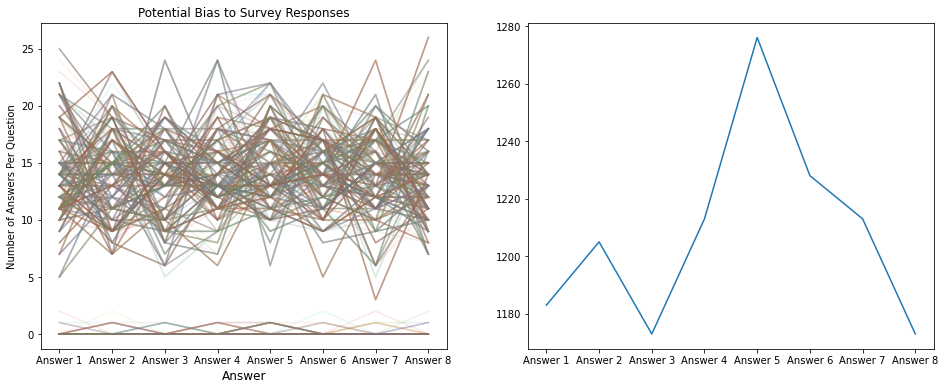

In [140]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.plot(count, alpha = .1)
plt.title("Potential Bias to Survey Responses")
plt.ylabel("Number of Answers Per Question")
plt.xlabel("Answer", fontsize='large')

plt.subplot(1,2,2)
plt.plot(total)

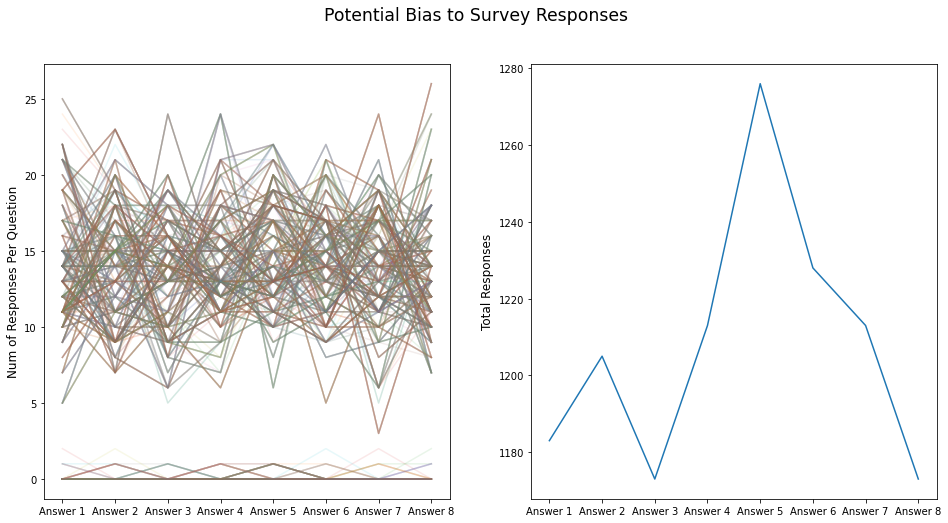

In [156]:
fig = plt.figure(figsize = (16,8))
st = fig.suptitle("Potential Bias to Survey Responses", fontsize = 'xx-large')

ax1 = fig.add_subplot(121)
ax1.plot(count, alpha = .1)
plt.ylabel("Num of Responses Per Question", fontsize="large")

ax2 = fig.add_subplot(122)
plt.ylabel("Total Responses", fontsize="large")
ax2.plot(total)

## Conclusion

In this single survey there seems to be a small amount of Bias to answering the questions with answers 4-7. If the Survey is designed on a Likert scale, the normal distribution might be off, looking at the low amount of total responses for answer 3. This distribution of responses seems acceptable due to the number of respondents in the survey totaling 198. 